In [28]:
import ogstools as ot
import numpy as np
import matplotlib.pyplot as plt
import vtuIO

In [29]:
#m = ot.Project(input_file="fault_slip_SD_MC_reference.prj", output_file="fault_slip_SD_MC_reference.prj")

In [30]:
#m.write_input()

In [31]:
#m.run_model(path="~/github/ogs-build/FaultSlipModels/bin/", logfile="out_one_anchor.log", background=True)

In [32]:
#m.plot_log(log_data = ["step_start_time","iteration_number"])    

In [33]:
pts = {"ptl1": (11.0, 15.0, 0.0), "ptr1": (13.0, 15.0, 0.0),
       "ptl2": (9.0, 10.0, 0.0), "ptr2": (11.0, 10.0, 0.0),
       "ptl3": (5.0, 4.0, 0.0), "ptr3": (9.0, 4.0, 0.0)}

In [34]:
files = ["fault_slip_ref.pvd", "fault_slip_WP_ref.pvd", "fault_slip_nonIter_WP_ref.pvd"]#["fault_slip_ref.pvd", "fault_slip_anchors.pvd", "fault_slip_anchors_prestress.pvd"]
f = {}
for file in files:
    f[file.replace("fault_slip_","").replace(".pvd","")] = vtuIO.PVDIO(file, dim=2)

In [35]:
data = {}
for entry in f:
    data[entry] = f[entry].read_time_series("displacement", pts=pts)

In [36]:
colors = ['b', 'r', 'g', 'y']

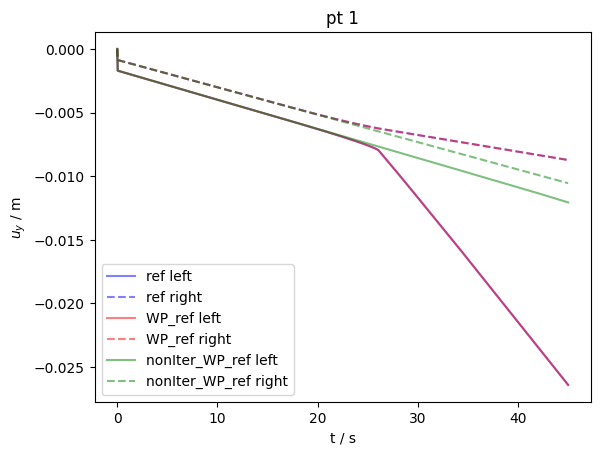

In [37]:
for i, entry in enumerate(data):
    plt.plot(f[entry].timesteps, data[entry]["ptl1"][:,1], f"{colors[i]}-", label=f"{entry} left", alpha=0.5)
    plt.plot(f[entry].timesteps, data[entry]["ptr1"][:,1], f"{colors[i]}--", label=f"{entry} right", alpha=0.5)
plt.ylabel("$u_y$ / m")
plt.xlabel("t / s")
plt.title("pt 1")
plt.legend()
plt.savefig("MC_vs_WP_models.png")

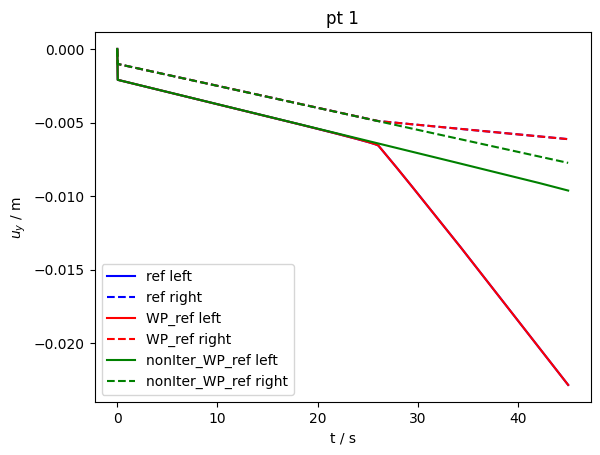

In [38]:
for i, entry in enumerate(data):
    plt.plot(f[entry].timesteps, data[entry]["ptl2"][:,1], f"{colors[i]}-", label=f"{entry} left")
    plt.plot(f[entry].timesteps, data[entry]["ptr2"][:,1], f"{colors[i]}--", label=f"{entry} right")
plt.ylabel("$u_y$ / m")
plt.xlabel("t / s")
plt.title("pt 1")
plt.legend()

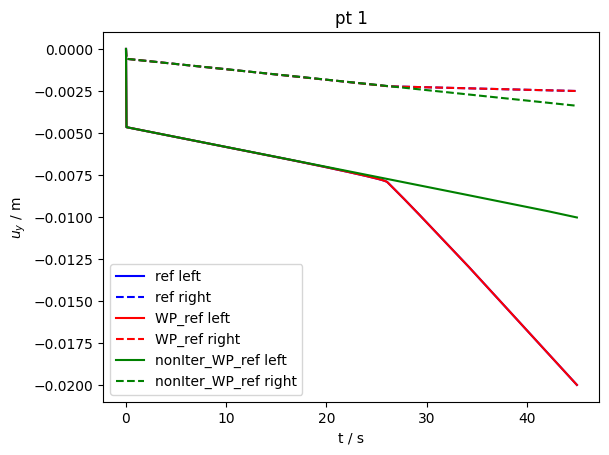

In [39]:
for i, entry in enumerate(data):
    plt.plot(f[entry].timesteps, data[entry]["ptl3"][:,1], f"{colors[i]}-", label=f"{entry} left")
    plt.plot(f[entry].timesteps, data[entry]["ptr3"][:,1], f"{colors[i]}--", label=f"{entry} right")
plt.ylabel("$u_y$ / m")
plt.xlabel("t / s")
plt.title("pt 1")
plt.legend()